### Сидоров Никита, БПМ161
# ЛАБОРАТОРНАЯ РАБОТА 6.
## ЧИСЛЕННОЕ ИНТЕГРИРОВАНИЕ

### Задание 1 (6.1.23)

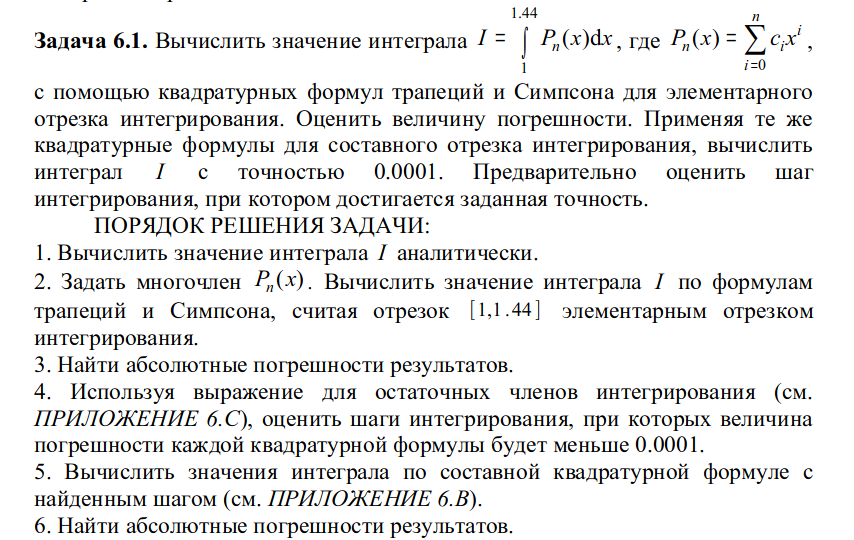

In [1]:
from IPython.display import Image
Image("/home/nikita/Изображения/6_task1.png")

In [2]:
Image("/home/nikita/Изображения/6_task1_2.png")

Вычислим значение интеграла аналитически.

$\int_1^{1.44} (7.9-0.4x+2.7x^2+0.7x^3-2.4x^4-2.7x^5) dx = -0.428145$

In [3]:
import numpy as np
import sympy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def P(x):
    """Возвращает значение многочлена P(x) в точке х."""
    return 7.9-0.4*x+2.7*x**2+0.7*x**3-2.4*x**4-2.7*x**5

In [26]:
def integrate_trapeze(f,a,b,h):
    """Интегрирует функцию f(x) по отрезку [a,b] методом трапеций с шагом h.
    
    Возвращает значение интеграла."""
    
    x = np.linspace(a,b,round((b-a)/h)+1)
    return h*( (f(x[0])+f(x[-1]))*0.5 + f(x[1:-1]).sum() )

def integrate_Simpson(f,a,b,h):
    """Интегрирует функцию f(x) по отрезку [a,b] методом Симпсона с шагом h.
    
    Возвращает значение интеграла."""
    
    x = np.linspace(a,b,round((b-a)/h)+1)
    x_med = (x[:-1]+x[1:])*0.5
    return h*(f(x[0])+4*f(x_med).sum()+2*f(x[1:-1]).sum()+f(x[-1]))/6

Вычислим значение интеграла по формулам трапеций и Симпсона, считая отрезок $[1, 1.44 ]$ элементарным отрезком интегрирования.

In [27]:
a = 1
b = 1.44
h = 0.44
true_value = -0.428145
res_trapeze = integrate_trapeze(P,a,b,h)
res_Simpson = integrate_Simpson(P,a,b,h)
print("По формуле трапеций:",res_trapeze)
print("По формуле Симпсона:",res_Simpson)

По формуле трапеций: -1.3693548537855995
По формуле Симпсона: -0.4307384240895991


Как видно, результаты не совпадают с истинным значением. Найдём погрешности результатов. 

Для метода трапеций:

$f''(x) = 5.4+4.2x-28.8x^2-54x^3$

$\max{|f''(x)|}= 209.515$

In [28]:
M2 = 209.515
print("Теоретическая погрешность:", M2*(b-a)*h**2/12)
print("Полученная погрешность:", abs(true_value - res_trapeze))

Теоретическая погрешность: 1.4872771466666663
Полученная погрешность: 0.9412098537855995


Для метода Симпсона:

$f''''(x) = -57.6 - 324x$

$\max{|f''''(x)|}= 524.16$

In [29]:
M4 = 524.16
print("Теоретическая погрешность:", M4*(b-a)*h**4/2880)
print("Полученная погрешность:", abs(true_value - res_Simpson))

Теоретическая погрешность: 0.003001475276799999
Полученная погрешность: 0.0025934240895991167


Найдём величину шага, при которой ошибка будет меньше 0.0001.

In [30]:
h_trapeze=0.44
while M2*(b-a)*h_trapeze**2/12 >= 0.0001:
    h_trapeze /= 2
print(h_trapeze)

0.0034375


In [31]:
h_Simpson=0.44
while M4*(b-a)*h_Simpson**4/2880 >= 0.0001:
    h_Simpson /= 2
print(h_Simpson)

0.11


Проинтегрируем с найденной величиной шага.

In [32]:
res_trapeze = integrate_trapeze(P,a,b,h_trapeze)
res_Simpson = integrate_Simpson(P,a,b,h_Simpson)
print("Метод трапеций", res_trapeze)
print("Метод Симпсона", res_Simpson)

Метод трапеций -0.42820319644368116
Метод Симпсона -0.42815524657509957


Найдём абсолютные погрешности результатов.

In [33]:
print("Метод трапеций", abs(true_value - res_trapeze))
print("Метод Симпсона", abs(true_value - res_Simpson))

Метод трапеций 5.819644368115773e-05
Метод Симпсона 1.024657509957061e-05


### Задание 2 (6.3.8)

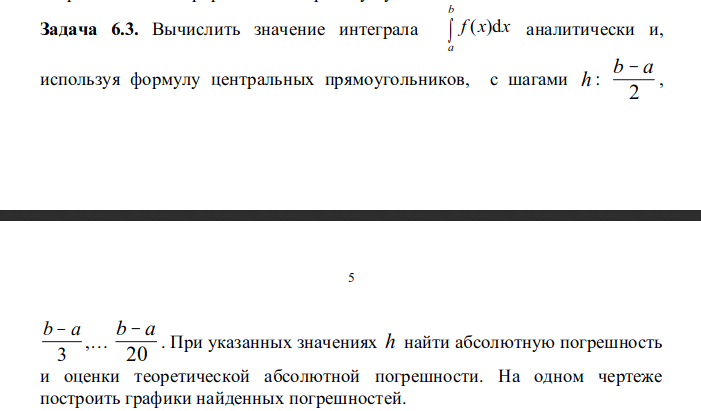

In [58]:
Image("/home/nikita/Изображения/6_task2.png")

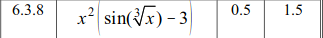

In [65]:
Image("/home/nikita/Изображения/6_task2_2.png")

Вычислим значение интеграла аналитически:

$\int_{0.5}^{1.5} x^2(\sin{(\sqrt[3]{x})-3}) dx = -0.99985$

In [59]:
def f(x):
    return x**2*(np.sin(np.cbrt(x)-3))

In [60]:
x = sympy.Symbol("x")
#Дифференцируем при помощи sympy и задаём f'(x), f''(x)
f_prime = sympy.lambdify(x,sympy.diff(sympy.sqrt(x)*sympy.exp(sympy.cos(x))-1,x))
f_second_prime = sympy.lambdify(x,sympy.diff(sympy.diff(sympy.sqrt(x)*sympy.exp(sympy.cos(x))-1,x),x))

In [61]:
a = 0.5
b = 1.5
true_value = -0.99985
#Задаём шаги h
h_s = np.array([(b-a)/n for n in np.arange(2,21)])

In [65]:
def integrate_central(f,a,b,h):
    """Интегрирует функцию f(x) по отрезку [a,b] методом центральных прямоугольников с шагом h.
    
    Возвращает значение интеграла."""
    
    x = np.linspace(a,b,round((b-a)/h)+1)
    x_med = (x[:-1]+x[1:])*0.5
    return h*(f(x_med).sum())

Для вычисления теоретических погрешностей найдём максимум модуля второй производной.

In [66]:
x_s = np.linspace(a,b,10000)
M2 = np.max(np.abs(f_second_prime(x_s)))
print("max |f''(x)| = ",M2)

max |f''(x)| =  4.4328815143080185


In [67]:
results = []
abs_errors = []
theor_errors = []
for h in h_s:
    res = integrate_central(f,a,b,h)
    results.append(res)
    abs_errors.append(abs(true_value - res))
    theor_errors.append(M2*(b-a)*h**2/24)

/home/nikita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


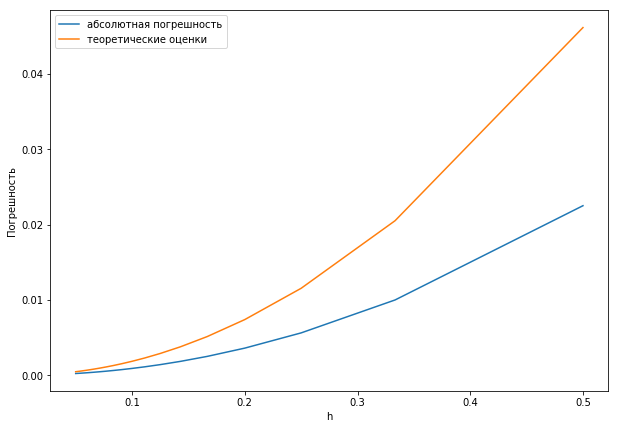

In [68]:
plt.figure(figsize = (10,7))
plt.plot(h_s,abs_errors,label='абсолютная погрешность')
plt.plot(h_s,theor_errors,label='теоретические оценки')
plt.xlabel('h')
plt.ylabel('Погрешность')
plt.legend()

В логарифмической шкале:

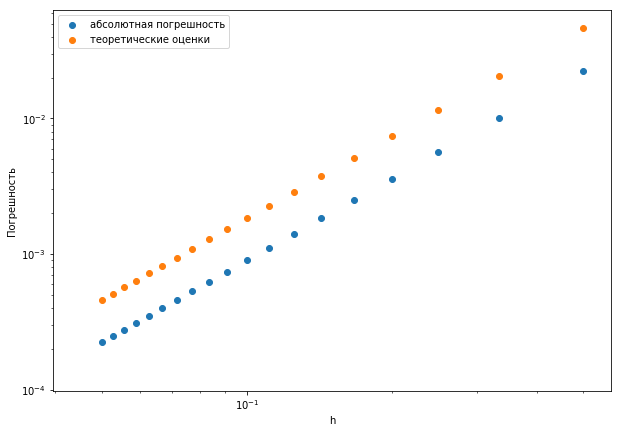

In [69]:
plt.figure(figsize = (10,7))
plt.scatter(h_s,abs_errors,label='абсолютная погрешность')
plt.scatter(h_s,theor_errors,label='теоретические оценки')
plt.xlabel('h')
plt.ylabel('Погрешность')
plt.xscale('log')
plt.yscale('log')
plt.legend()

### Задание 3 (6.7.8)

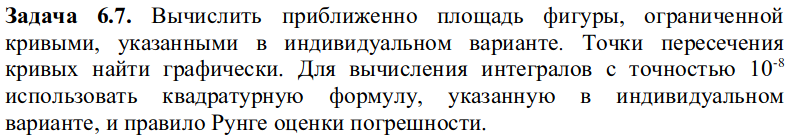

In [70]:
Image("/home/nikita/Изображения/6_task3.png")

In [71]:
Image("/home/nikita/Изображения/6_task3_2.png")

In [72]:
def f1(x):
    return 3/x
def f2(x):
    return 4-x

Строим графики функций.

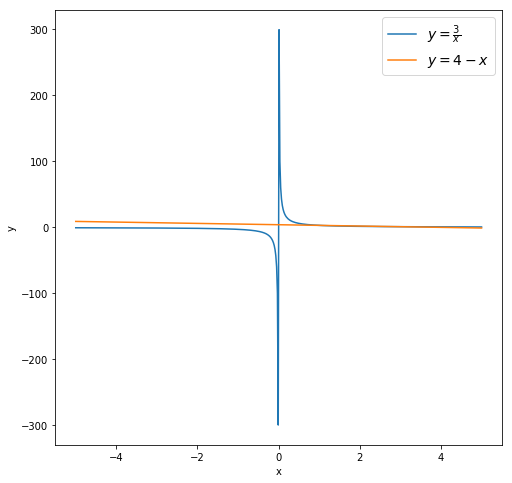

In [73]:
x_s = np.linspace(-5,5,500)
plt.figure(figsize = (8,8))
plt.plot(x_s,f1(x_s),label='$y=\\frac{3}{x}$')
plt.plot(x_s,f2(x_s),label='$y=4-x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=14)

Увеличиваем нужную область.

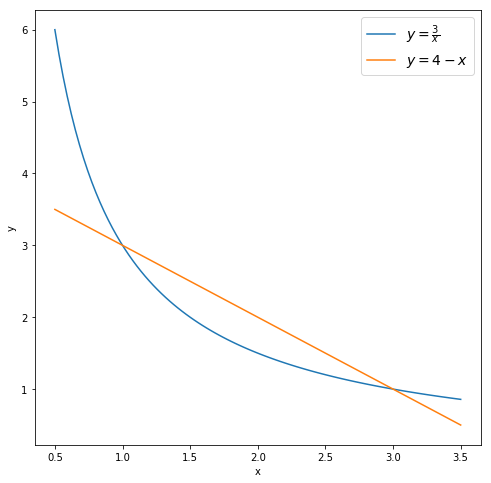

In [74]:
x_s = np.linspace(0.5,3.5,100)
plt.figure(figsize = (8,8))
plt.plot(x_s,f1(x_s),label='$y=\\frac{3}{x}$')
plt.plot(x_s,f2(x_s),label='$y=4-x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=14)

Точки пересечения:

$\frac{3}{x}=4-x$

$3=4x-x^2$

$x=1, x=3$

In [75]:
def get_area(f1,f2,a,b,eps):
    """Ищет площадь между графиками функций f1 и f2 на отрезке [a,b] как разность интегралов.
    Решение находит с точностью eps, погрешность оценивается по правилу Рунге.
    
    Возвращает найденную площадь.
    """
    h = b-a
    S_old = 0
    I1 = integrate_Simpson(f1,a,b,h)
    I2 = integrate_Simpson(f2,a,b,h)
    S_new = abs(I1-I2)
    while abs(S_old-S_new)>=eps:
        S_old = S_new
        h /= 2
        I1 = integrate_Simpson(f1,a,b,h)
        I2 = integrate_Simpson(f2,a,b,h)
        S_new = abs(I1-I2)
        
    return S_new

In [76]:
a=1
b=3
eps=1e-8
get_area(f1,f2,a,b,eps)

0.7041631336277949

### Задание 4 (6.6.23)

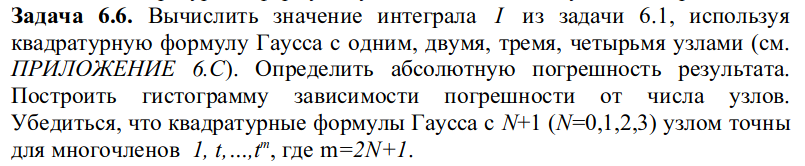

In [77]:
Image("/home/nikita/Изображения/6_task4.png")

In [78]:
Image("/home/nikita/Изображения/6_task1_2.png")

In [79]:
a = 1
b = 1.44
true_value = -0.428145

In [80]:
def intergrate_Gauss(f,a,b,N):
    """Вычисляет значение интеграла функции f(х) по отрезку [a,b],
    используя квыдратурную формулу Гаусса с N узлами.
    
    Возвращает значение интеграла."""
    if N==1:
        t=np.array([0])
        A=np.array([2])
    elif N==2:
        t=np.array([-0.577350269189626,0.577350269189626])
        A=np.array([1,1])
    elif N==3:
        t=np.array([-0.77459666929954,0,0.77459666929954])
        A=np.array([0.55555555555556,0.88888888888888,0.55555555555556])
    elif N==4:
        t=np.array([-0.861136311594052,-0.339981043584856,0.339981043584856,0.861136311594052])
        A=np.array([0.347854845137454,0.652145154862546,0.652145154862546,0.347854845137454])
        
    return (b-a)*0.5*np.sum(A*f((a+b)*0.5+(b-a)*0.5*t))

In [81]:
N_s = np.arange(1,5)
errors = []
for N in N_s:
    res = intergrate_Gauss(P,a,b,N)
    print(N,"узлов: ",res)
    errors.append(abs(true_value - res))

1 узлов:  0.03856979075840101
2 узлов:  -0.4264162447189331
3 узлов:  -0.4281451165377471
4 узлов:  -0.42814511646719927


Зависимость погрешности от числа узлов:

Text(0, 0.5, 'Погрешность')

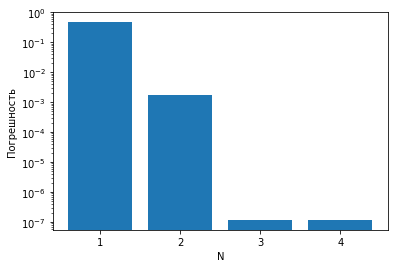

In [82]:
plt.bar(N_s,errors,tick_label = ['1','2','3','4'])
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Погрешность')

Убедиться, что квадратурные формулы Гаусса с $N+1$ $(N=0,1,2,3)$ узлом точны для многочленов $1, t,...,t^m$ , где $m=2N+1$.

$\int_0^{1} 1 dx = 1$

$\int_0^{1} x dx = 0.5$

$\int_0^{1} x^2 dx = \frac{1}{3} \sim 0.33333$

$\int_0^{1} x^3 dx = 0.25$

$\int_0^{1} x^4 dx = 0.2$

$\int_0^{1} x^5 dx = \frac{1}{6} \sim 0.16667$

$\int_0^{1} x^6 dx = \frac{1}{7} \sim 0.14286$

$\int_0^{1} x^7 dx = 0.125$

In [83]:
for N in range(4):
    print('N+1 =', N+1)
    for m in range(2*N+2):
        print('x^',m,': ',intergrate_Gauss(lambda x: x**m,0,1,N+1))

N+1 = 1
x^ 0 :  1.0
x^ 1 :  0.5
N+1 = 2
x^ 0 :  1.0
x^ 1 :  0.5
x^ 2 :  0.33333333333333337
x^ 3 :  0.2500000000000001
N+1 = 3
x^ 0 :  1.0
x^ 1 :  0.5
x^ 2 :  0.3333333333458258
x^ 3 :  0.25000000001873873
x^ 4 :  0.20000000002248636
x^ 5 :  0.16666666669165137
N+1 = 4
x^ 0 :  1.0
x^ 1 :  0.5
x^ 2 :  0.33333333333333326
x^ 3 :  0.2499999999999999
x^ 4 :  0.19999999999999984
x^ 5 :  0.16666666666666652
x^ 6 :  0.14285714285714268
x^ 7 :  0.1249999999999998


Как видно, результаты действительно совпадают.

### Задание 5 (6.9.23)

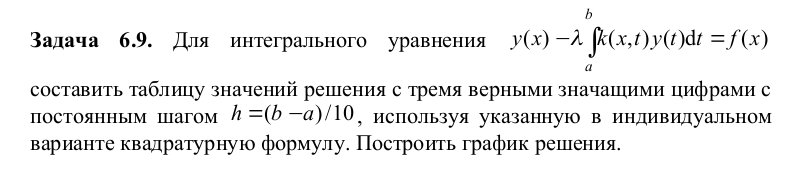

In [4]:
Image("/home/nikita/Изображения/6_task5.png")

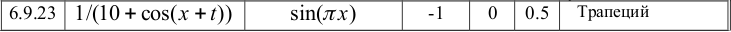

In [5]:
Image("/home/nikita/Изображения/6_task5_2.png")

In [85]:
def k(x,t):
    return 1/(10+np.cos(x+t))
def f(x):
    return np.sin(np.pi*x)
lambd = -1
a = 0
b = 0.5
h = (b-a)*0.1

Сведём интегральное уравнение к системе линейных, заменив интеграл на сумму по методу трапеций.

$y(x) -\lambda h ( \frac{k(x,t_0)y(t_0)+k(x,t_n)y(t_n)}{2} + \sum_{i=1}^{n-1}k(x,t_i)y(t_i) ) = f(x)$

$y_j -\lambda h ( \frac{k(t_j,t_0)y_0+k(t_j,t_n)y_n}{2} + \sum_{i=1}^{n-1}k(t_j,t_i)y_i ) = f_j$, где $j=0,...,n$

In [86]:
t = np.linspace(a,b,int((b-a)/h)+1)
n = len(t)
A = np.zeros((n,n))
for j in range(n):
    for i in range(n):
        A[j,i] = k(t[j],t[i])
A *= -lambd*h
A[:,0] *= 0.5
A[:,-1] *= 0.5
A += np.eye(n)
betta = np.array([f(t_j) for t_j in t])

In [87]:
y = np.linalg.solve(A,betta)
table = pd.DataFrame(np.hstack((t[:,None],np.round(y[:,None],3))),columns=['x','y'])
table

,x,y
0,0.00,-0.028
1,0.05,0.129
2,0.10,0.281
3,0.15,0.426
4,0.20,0.560
5,0.25,0.679
6,0.30,0.781
7,0.35,0.863
8,0.40,0.923
9,0.45,0.959


Построим график функции по найденным точкам.

Text(0, 0.5, 'y')

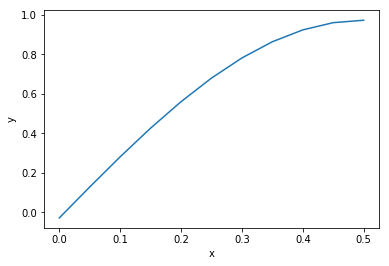

In [89]:
plt.plot(t,y)
plt.xlabel('x')
plt.ylabel('y')

Раз теперь известны значения y(x) в точках $t_i$, найдём функцию y(x), используя sympy и формулу:
$y(x) -\lambda h ( \frac{k(x,t_0)y(t_0)+k(x,t_n)y(t_n)}{2} + \sum_{i=1}^{n-1}k(x,t_i)y(t_i) ) = f(x)$

In [91]:
x = sympy.Symbol("x")

In [92]:
def k(x,t):
    return 1/(10+sympy.cos(x+t))
def f(x):
    return sympy.sin(sympy.pi*x)

In [94]:
yy = (k(x,t[0])*y[0]*0.5 + k(x,t[-1])*y[-1]*0.5 + sum([k(x,t[j])*y[j] for j in range(1,n-1)]))*lambd*h + f(x)

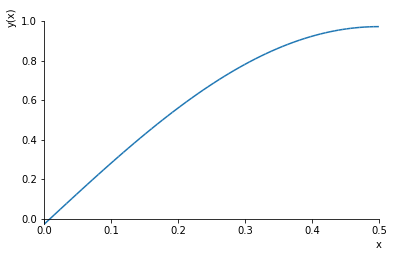

In [96]:
sympy.plot(yy,(x,a,b),ylabel = 'y(x)')
